# A simple model of a pandemic

Introduction

---

## How the model works

Neighbours infect each other with probability...

In [1]:
from lattice import SquareLattice
from model import PandemicModel

In [3]:
lattice = SquareLattice(length=100)
model = PandemicModel(lattice) # initialise model with default arguments
#help(model)
model.evolve(1000)

Days: 100%|██████████| 1000/1000 [00:00<00:00, 3373.13it/s]


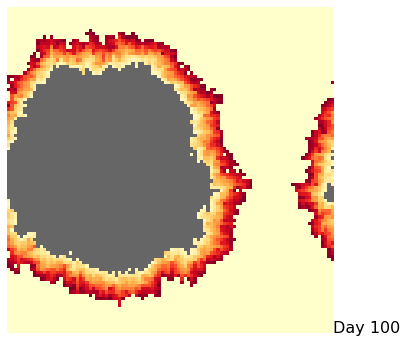

In [9]:
##### TESTING
from time import time
test = PandemicModel(
    lattice,
    transmission_prob=0.25,
    infection_duration=21,
    infected_are_immune=True,
    travel_rate=0,
)
#t1 = time()
test.animate(n_days=100, interval=30)
#t2 = time()
#print(t2 - t1)

45/101 days spent above the critical threshold of 0.1
Area above critical threshold: 19.8547


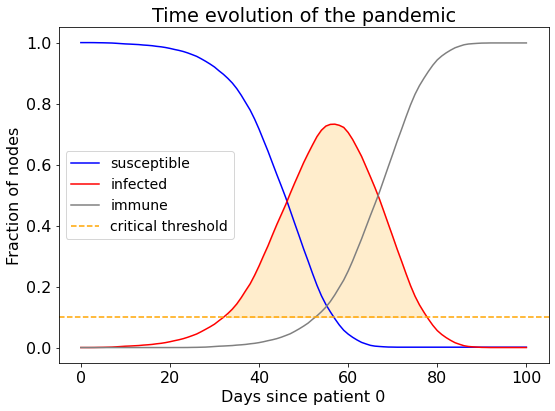

In [5]:
test.plot_evolution()

# Task 1

## 1.1 : 100% transmission probability, no vaccinations

In [ ]:
model.init_state()
model.animate(n_days=150)

In [ ]:
model.plot_evolution()

## 1.2 : Introducing stochasticity - transmission probability < 1

In [ ]:
model.transmission_prob = 0.25

In [ ]:
model.init_state()
model.animate(n_days=200)

In [ ]:
model.plot_evolution()

## 1.3 : Recovery and immunity

In [ ]:
model.infection_duration = 21  # 3 weeks
model.infected_are_immune = True

In [ ]:
model.init_state()
model.animate(n_days=200)

In [ ]:
model.plot_evolution()

In [ ]:
bigger_lattice = SquareLattice(50)
bigger_model = PandemicModel(bigger_lattice, transmission_prob=0.25, infected_are_immune=True, infection_duration=21)
bigger_model.animate(n_days=200)

In [ ]:
bigger_model.plot_evolution()

## 1.4 : Mixing (population travel)

In [ ]:
model.travel_rate = 10

In [ ]:
model.init_state()
model.animate(n_days=200)

In [ ]:
model.plot_evolution()

## 1.5 : Vaccinations

In [ ]:
model.vaccine_frac = 0.4

In [ ]:
model.init_state()
model.animate(n_days=200)

In [ ]:
model.plot_evolution()

## Task 2

In [11]:
import matplotlib.pyplot as plt
import numpy as np


length:  418
length:  196
length:  229
length:  474
length:  376
length:  62
length:  195
length:  155
length:  387
length:  468
length:  308
length:  329
length:  475
length:  381
length:  220
length:  438
length:  437
length:  346
length:  347
length:  105
length:  321
length:  356
length:  481
length:  466
length:  326


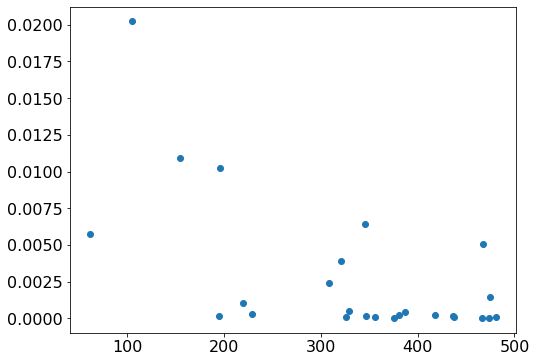

In [13]:
lengths = np.random.randint(4, 512, size=(25,))
peaks = []
for l in lengths:
    print("length: ", l)
    latt = SquareLattice(length=l)
    mod = PandemicModel(
        latt,
        transmission_prob=0.25,
        vaccine_frac=0.5,
        infected_are_immune=True,
        travel_rate=1,
    )
    mod.evolve(n_days=3*l, display_progress_bar=False)
    peaks.append(max(mod._infected_time_series) / l**2)

fig, ax = plt.subplots()
ax.scatter(lengths, peaks)

plt.show()
        